**Autor:** Andrej Gajdoš  <br> 
_[Ústav matematických vied](https://www.upjs.sk/prirodovedecka-fakulta/ustav/umv/), [Prírodovedecká fakulta](https://www.upjs.sk/prirodovedecka-fakulta/), Univerzita Pavla Jozefa Šafárika v Košiciach,_ <br> 
email: [andrej.gajdos@upjs.sk](mailto:andrej.gajdos@upjs.sk)
*** 

**_Tento materiál vznikol za podpory grantu VVGS-2022-2412._**

***

**<font size=6 color=gold> NUM: Téma 5 - Numerické riešenie nelineárnych rovníc </font>** 

--- 

<a id=table_of_contents></a>
##  Obsah

* [Úvod](#uvod)


* [Metóda bisekcie (polenia intervalu)](#bisekcia) 


* [Metóda prostej iterácie (metóda postupných aproximácií)](#prosta_iteracia)


* [Newtonova metóda (Newtonova-Raphsonova / dotyčnicová metóda)](#newton) 


* [Metóda sečníc](#secnice) 


* [Metóda regula falsi (metóda tetív)](#regula_falsi) 


* [Doplňujúce poznámky](#doplnujuce)


* [Použité zdroje](#zdroje) 


**Pre návrat na obsah stlačte klávesu <font color=brown>Home</font>.** 

---

In [2]:
# nacitanie potrebnych balikov v Python-e 
import math 
import numpy as np 
import sympy as sym 
import scipy as sci 
from decimal import Decimal
from matplotlib import pyplot as plt

***
<a id=uvod></a>
 # <font color=brown> Úvod </font> 

**Korene nelineárnej rovnice $f(x)=0$ vo všeobecnosti nevieme vyjadriť explicitným vzorcom.** Príkladom môže byť rovnica $x-\mathrm{tan}(x)=0$ vyskytujúca sa pri difrakcii (ohybe) svetla alebo Keplerova rovnica $x-b\sin(x)=0$ používaná pri výpočte obežných dráh planét. Ďalej sa môže jednať o transcendentálne rovnice ako napr. $f(x)=e^x+x=0$ či algebraické rovnice ako napr. $x^7+4x^5-7x^2+6x+3=0$. Výnimkou sú napr. prípady, keď $f$ je kvadratická alebo kubická či bikvadratická (kvartická) polynomická funkcia. **K vyriešeniu nelineárnej rovnice preto používame numerické iteračné metódy.** **Ich spoločná myšlienka spočíva v tom, že z jednej alebo z viacerých počiatočných aproximácií (odhadov) hľadaného koreňa $x^*$ generujeme postupnosť $x_0,x_1,x_2,\ldots$ takú, že táto postupnosť konverguje ku koreňu $x^*$.** Pre niektoré metódy postačuje zadať interval $\langle a,b \rangle$ obsahujúci hľadaný koreň. Iné metódy zase vyžadujú, aby počiatočná aproximácia (štartovací bod) bola dostatočne blízko k hľadanému koreňu, no a tieto metódy potom konvergujú k skutočnému koreňu rýchlejšie. Častokrát sa teda začína s "hrubou" (menej presnou resp. pomalšie konvergujúcou) ale spoľahlivou metódou a keď sme už dostatočne blízko hľadaného koreňa, tak prejdeme na "jemnejšiu" (presnejšíu resp. rýchlejšie konvergujúcu) metódu. 

Kvôli zjednodušeniu našich úvah sa obmedzíme na hľadanie jednoduchého reálneho koreňa $x^*$ nelineárnej rovnice $f(x)=0$, tzn., že predpokladáme $f'\left(x^*\right)\neq0$. Automaticky budeme predpokladať, že funkcia $f$ je spojitá na intervale $\langle a,b \rangle$ a má toľko spojitých derivácií, koľko si ich daná situácia vyžaduje. 

## Určenie počiatočnej aproximácie 

Počiatočné aproximácie koreňov rovnice $f(x)=0$ je možné zistiť napr. z grafu funkcie $f$ tak, že po vykreslení grafu (v Pythone) nájdeme približné priesečníky grafu funkcie $f$ s osou $x$. Iná možnosť je zostavenie tabuľky pozostávajúcej z bodov $[x_i,f(x_i)]$ pre nejaké delenie $a=x_0<x_1<\ldots<x_{i-1}<x_i<\ldots<x_n=b$ zvoleného intervalu $\langle a,b \rangle$. Ak v dvoch susedných bodoch tabuľky nadobúda funkcia $f$ rôzne znamienka, t. j. ak $f(x_{i-1})f(x_i)<0$, potom medzi bodmi $x_{i-1}$, $x_i$ leží reálny koreň rovnice $f(x)=0$ (pozri nižšie Vetu 1).

--- 

#### <font color=blue> Príklad 1 </font> 

Získajte hrubé odhady koreňov rovnice $f(x)=0$, kde $f(x)=4\sin(x)-x^3-1$.  

<ins> Riešenie: </ins>

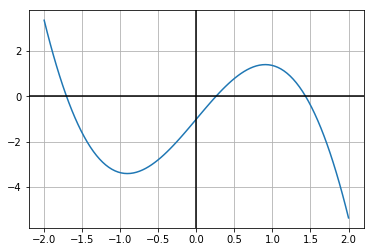

In [8]:
def f(x): 
    return 4*np.sin(x) - x**3 - 1

x = np.linspace(-2, 2, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.grid(True, which='both') 
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k'); 

In [27]:
# odhad korenov na zaklade tabulky a zmien znamienok funkcnych hodnot 
table_data = [[x,f(x)] for x in np.linspace(-2,2,5)] 
headers = ['x', 'f(x)']
print('{: >20} {: >20}'.format(*headers)) 
for row in table_data:
    print('{: >20} {: >20}'.format(*row))

                   x                 f(x)
                -2.0    3.362810292697273
                -1.0   -3.365883939231586
                 0.0                 -1.0
                 1.0    1.365883939231586
                 2.0   -5.362810292697273


--- 

Z grafu ľahko vyčítame existenciu troch koreňov: $x_1^*\in(-2,-1)$, $x_2^*\in(0,1)$, $x_3^*\in(1,2)$. 

***
<a id=bisekcia></a>
 # <font color=brown> Metóda bisekcie (polenia intervalu) </font> 

Na princípe **zmien znamienok** funkčných hodnôt je založená **_metóda bisekcie (polenia intervalu)_**. Presnejšie teda vychádza z Vety 1. 

Dobre známa **Bolzanova veta** pojednáva o tom, že ak máme spojitú funkciu $f$ na uzavretom intervale $\langle a,b \rangle$ a funkčné hodnoty v krajných bodoch intervalu majú rôzne znamienka t.j. $f(a)\cdot f(b)<0$, potom musí graf funkcie $f$ pretínať os $x$ na intervale $\langle a,b \rangle$. Inými slovami, existuje $\xi \in \langle a,b \rangle$ také, že platí $f(\xi)=0$, tzn. $\xi$ je nulový bod funkcie $f$ na intervale $\langle a,b \rangle$ resp. koreň rovnice $f(x)=0$. 

--- 

### <font color=green> Veta 1 (Bolzano) </font> 

Nech funkcia $f$ je definovaná a spojitá na intervale $\langle a,b \rangle$ a nech $f(a)f(b)<0$. Potom existuje $ \xi \in ( a,b )$ také, že $ f(\xi) = 0$.

--- 

Predpokladajme, že funkcia $f$ má v koncových bodoch intervalu $\langle a,b \rangle$ rôzne znamienka a položme $a_0=a$, $b_0=b$. tým pádom platí $f(a_0)f(b_0)<0$. Zostrojíme postupnosť intevalov $(a_1,b_1)\supset(a_2,b_2)\supset(a_3,b_3)\supset\ldots$, ktoré (vďaka Bolzanovej vete) budú obsahovať koreň rovnice $f(x)=0$. Intervaly $(a_{k+1},b_{k+1})$, $k=0,1,\ldots$ určíme rekurzívnym spôsobom, ktorý teraz ozrejmíme. 

Stred intervalu $(a_k,b_k)$ je bod $x_{k+1}=\dfrac{a_k+b_k}{2}$. Ak $f(x_{k+1})=0$, tak $x^*=x_{k+1}$ je hľadaný koreň a ďalej nemá zmysel pokračovať. Pokiaľ ale $f(x_{k+1})\neq0$, tak položíme 

\begin{equation*} \label{eq:BisectionMethodStep} \tag{1} 
(a_{k+1},b_{k+1})=\begin{cases}
(a_k,x_{k+1}), \quad \text{ ak } \quad f(a_k)f(x_{k+1}) < 0, \\ 
(x_{k+1},b_k), \quad \text{ ak } \quad f(a_k)f(x_{k+1}) > 0. 
\end{cases}
\end{equation*}

Z konštrukcie $(a_{k+1},b_{k+1})$ okamžite vyplýva $f(a_{k+1})f(b_{k+1})<0$, preto každý interval zostrojený podľa \eqref{eq:BisectionMethodStep} obsahuje koreň. Zrejme po $k$ krokoch je hľadaný koreň v intevale $I_k=(a_k,b_k)$ dĺžky 

$$|I_k|=b_k-a_k=2^{-1}(b_{k-1}-a_{k-1})=\ldots=2^{-k}(b_0-a_0).$$ 

**Stred $x_{k+1}$ intervalu $(a_k,b_k)$ aproximuje koreň $x^*$ s chybou** 

\begin{equation*} \label{eq:BisectionMethodErr} \tag{2} 
\left|x_{k+1}-x^*\right|\le\dfrac{b_k-a_k}{2}=2^{-k-1}(b_0-a_0). 
\end{equation*} 

Zrejme pre $k\to\infty$ platí $|I_k|\to0$ a $x_k\to x^*$ (napr. podľa "vety o zovretí"). 

Niekoľko prvých iterácií metódy polenia intervalu znázořnuje tento obrázok: 

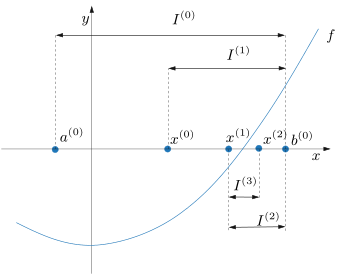 
$$\text{Zdroj: Quarteroni et al. (2016).}$$


---

#### Poznámka 1 

Niekedy sa zvykne na začiatku stanoviť tzv. **presnosť $\varepsilon$ a výpočet končí vtedy, keď** (prvýkrát) **nastane $|x_{k+1}-x_{k}|<\varepsilon$**. Potom hovoríme, že aproximácia koreňa je nájdená s presnosťou $\varepsilon$.   

--- 

--- 

#### <font color=blue> Príklad 2 </font> 

Aplikujte metódu bisekcie pre nájdenie koreňa rovnice $f(x)=0$, kde $f(x)=4\sin(x)-x^3-1$, na intervale $(1,2)$.  

<ins> Riešenie: </ins>

Ako počiatočný interval zvolíme $(a_0,b_0)=(1,2)$. Základná podmienka o rôznych znamienkach je splnená lebo platí $f(1)>0$, $f(2)<0$ a teda pre každé $k$ bude $f(a_k)\ge0$, $f(b_k)\le0$. Postupnosť intervalov je zaznamenaná v tabuľke. 

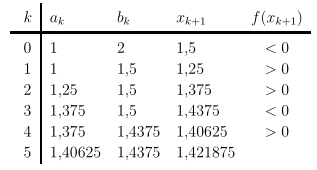 

Po piatich krokoch má interval $(a_k,b_k)$ dĺžku $2^{-5}=0.03125$ a $x_6=1.421875$ aproximuje koreň s chybou nepresahujúcou hodnotu $2^{-6}=0.015625$. 


In [3]:
# odkrokovany vypocet v Pythone 
def f(x): 
    return 4*np.sin(x) - x**3 - 1 

# k = 0
a0, b0 = 1, 2 
print('k=0:')
print('f(a0)=', f(a0), 'f(b0)=', f(b0))
print('===================================================')

# k = 1
x1 = (a0+b0)/2 
print('k=1:')
print('f(a0)*f(x1)=',f(a0)*f(x1))
print('x1=',x1) 
print('absolutna chyba je nanajvys', 2**(-2)*(b0-a0))
print('===================================================')
a1, b1 = a0, x1

# k = 2 
x2 = (a1+b1)/2
print('k=2:')
print('f(a1)*f(x2)=',f(a1)*f(x2))
print('x2=',x2) 
print('absolutna chyba je nanajvys', 2**(-3)*(b0-a0)) 
print('aproximacia korena s presnostou', np.abs(x2-x1))
print('===================================================')
a2, b2 = x2, b1

# k = 3 
x3 = (a2+b2)/2
print('k=3:')
print('f(a2)*f(x3)=',f(a2)*f(x3))
print('x3=',x3) 
print('absolutna chyba je nanajvys', 2**(-4)*(b0-a0)) 
print('aproximacia korena s presnostou', np.abs(x3-x2))
print('===================================================')
a3, b3 = x3, b2 

# k = 4 
x4 = (a3+b3)/2
print('k=4:')
print('f(a3)*f(x4)=',f(a3)*f(x4))
print('x4=',x4) 
print('absolutna chyba je nanajvys', 2**(-5)*(b0-a0))
print('aproximacia korena s presnostou', np.abs(x4-x3))
print('===================================================')
a4, b4 = a3, x4 

# k = 5 
x5 = (a4+b4)/2
print('k=5:')
print('f(a4)*f(x5)=',f(a4)*f(x5))
print('x5=',x5) 
print('absolutna chyba je nanajvys', 2**(-6)*(b0-a0)) 
print('aproximacia korena s presnostou', np.abs(x5-x4))
print('===================================================')
a5, b5 = x5, b4

k=0:
f(a0)= 1.365883939231586 f(b0)= -5.362810292697273
k=1:
f(a0)*f(x1)= -0.5258927074721728
x1= 1.5
absolutna chyba je nanajvys 0.25
k=2:
f(a1)*f(x2)= 1.1511853925791038
x2= 1.25
absolutna chyba je nanajvys 0.125
aproximacia korena s presnostou 0.25
k=3:
f(a2)*f(x3)= 0.2730402587706575
x3= 1.375
absolutna chyba je nanajvys 0.0625
aproximacia korena s presnostou 0.125
k=4:
f(a3)*f(x4)= -0.001925058726308186
x4= 1.4375
absolutna chyba je nanajvys 0.03125
aproximacia korena s presnostou 0.0625
k=5:
f(a4)*f(x5)= 0.05347226414401043
x5= 1.40625
absolutna chyba je nanajvys 0.015625
aproximacia korena s presnostou 0.03125


In [30]:
# vypocet pomocou balika SciPy 
from scipy import optimize 

def f(x): 
    return 4*np.sin(x) - x**3 - 1

root1 = optimize.bisect(f, 1, 2, rtol=2**(-6)) # nastavena absolutna chyba
print(root1) 

root2 = optimize.bisect(f, 1, 2) 
print(root2)

1.421875
1.4364503240412887


--- 

<font color=orange> Nájdite zvyšné korene rovnice z Príkladu 2. Postup odkrokujte (aspoň v Pythone - môžete využiť kód z Príkladu 2) a riešenie porovnajte s riešením pomocou balíka *SciPy*. Korene hľadajte s absolútnou chybou nepresahujúcou hodnotu $10^{-3}$. </font> 

---

#### Poznámka 2 

**Metóda bisekcie konverguje pomaly.** Všimnime si Príklad 2. Keďže $10^{-1}\doteq2^{-3.32}$, tak spresnenie o jednu dekadickú cifru vyžaduje v priemere 3.32 kroku. Všimnite si, že rýchlosť konvergencie vyjadrená vzťahom $(2)$ nezávisí na funkcii $f$. To preto, že metóda bisekcie využíva iba znamienka funkčných hodnôt $f(x)$. Pokiaľ ale tieto hodnoty (prípadne tiež hodnoty derivácií $f$) využijeme efektívnejšie, je možné dosiahnúť podstatne rýchlejšiu konvergenciu. Takéto "spresňujúce" metódy (napr. Newtonova dotyčnicová metóda) však konvergujú iba vtedy, ak je pre nich zvolená dostatočne dobrá počiatočná aproximácia. K tomu je možné využiť práve metódu bisekcie a určiť pomocou nej "rozumnú" počiatočnú aproximáciu pre inú (spresňujúcu) metódu. 

--- 

---

### <font color=red> Definícia 1 </font> 

Nech $\left\{x_n\right\}_{n=0}^{\infty}$ je postupnosť konvergujúca k $x^*$ a označme $e_k=x_k-x^*$. Ak existuje číslo $p\ge1$ a konštanta $C>0$ taká, že platí 

\begin{equation*} \label{eq:ConvergenceRate} \tag{3} 
\lim\limits_{k\to\infty}\dfrac{|e_{k+1}|}{|e_k|^p}=C,
\end{equation*}

potom $p$ sa nazýva **_rád konvergencie_** postupnosti a $C$ je **_(asymptotická) chybová konštanta_** (miera/intenzita konvergencie). 

--- 

---

#### Poznámka 3 

Špeciálne, ak v Definícii 1 je:


* $p=1$ a $C<1$, tak hovoríme o **_lineárnej konvergencii_**;  


* $1<p<2$, ide o **_superlineárnu konvergenciu_**; 


* $p=2$ hovoríme o **_kvadratickej konvergencii_**. 

--- 

---

### <font color=red> Definícia 2 </font> 

Povieme, že daná **_metóda je rádu $p$_**, ak všetky konvergentné postupnosti získané touto metódou majú rád konvergencie väčší alebo rovný $p$ a aspoň jedna z týchto postupností má rád konvergencie rovný presne $p$. 

--- 

---

#### Poznámka 4 

**V blízkosti koreňa platí: čím vyšší rád, tým rýchlejšia konvergencia**, lebo 

$$|e_{k+1}|\approx C|e_k|^p,$$

a teda keď je $|e_k|$ malé, tak $|e_{k+1}|$ je tým menšie, čím je väčšie $p$. 

---


--- 

#### <font color=blue> Príklad 3 </font> 

O rýchlosti konvergencie je možné uvažovať v prípade akejkoľvek (číselnej) konvergentnej postupnosti, nemusí to byť len postupnosť chýb aproximácií (zavedená v Definícii 1) iteračnej metódy. 

Predpokladajme teda, že postupnosť $\left\{p_n\right\}_{n=0}^{\infty}$ konverguje k $0$ lineárne, pričom platí 

$$\lim\limits_{n\to\infty}\dfrac{|p_{n+1}|}{|p_n|}=0.5.$$ 

Ďalej predpokladajme, že postupnosť $\left\{\tilde{p}_n\right\}_{n=0}^{\infty}$ konverguje k $0$ kvadraticky s rovnakou asymptotickou chybovou konštantou $0.5$, tzn. 

$$\lim\limits_{n\to\infty}\dfrac{|\tilde{p}_{n+1}|}{|\tilde{p}_n|^2}=0.5.$$

Pre jednoduchosť predpokladajme, že platí 

$$\dfrac{|p_{n+1}|}{|p_n|}\approx0.5 \quad \text{ a } \quad \dfrac{|\tilde{p}_{n+1}|}{|\tilde{p}_n|^2}\approx0.5.$$

Pre lineárne konvergujúcu postupnosť to znamená nasledovné: 

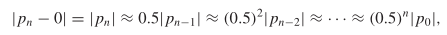 

zatiaľ čo pre kvadraticky konvergujúcu postupnosť máme 

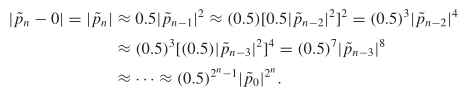 

Nasledujúca tabuľka ilustruje relatívnu rýchlosť konvergencie oboch postupností k $0$, pričom $|p_0|=|\tilde{p}_0|=1$. 

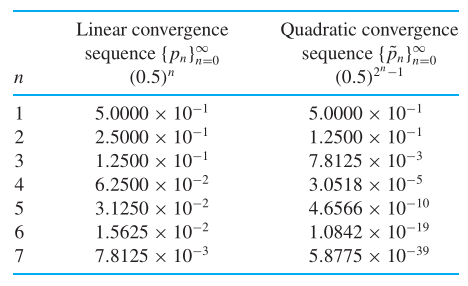 
$$\text{Zdroj: Burden & Faires (2011).}$$

Kvadraticky konvergentná postupnosť je v tolerancii $10^{−38}$ od $0$ už od siedmeho člena. Na zabezpečenie tejto presnosti pre lineárne konvergentnú postupnosť je potrebných aspoň 126 členov. 
 
--- 

***
<a id=prosta_iteracia></a>
 # <font color=brown> Metóda prostej iterácie (metóda postupných aproximácií)</font> 

---

### <font color=red> Definícia 3 </font> 

Nech $G$ je podmnožina $\mathbb{R}$ alebo $\mathbb{C}$,na ktorej je definovaná (reálna) funkcia $g$. Hovoríme, že $z\in G$ je **_pevný bod_** funkcie $g$, ak platí $g(z)=z$. 

--- 

---

#### Poznámka 5

* Ak $f(x)=g(x)-x$, potom pevný bod $z$ funkcie $g$ je vlastne nulový bod funkcie $f$ resp. koreň $x^*$ rovnice $f(x)=g(x)-x=0$. V tom prípade kladieme $x^*=z$. 


* Pevný bod funkcie $g$ je vlastne priesečník grafu funkcie $g(x)$ s priamkou $y=x$. 


* Príklad:  funkcia $g(x)=x^3$ má zrejme tri pevné body, konkrétne $z_1=-1$, $z_2=0$, $z_3=1$, lebo $f(z_1)=(-1)^3=-1=z_1$, $f(z_2)=0^3=0=z_2$, $f(z_3)=1^3=1=z_3$. 

--- 

**_Metóda prostej iterácie_** alebo niekedy tiež nazývaná **_metóda postupných aproximácií_** je definovaná vzťahom: 

\begin{equation*} \label{eq:FixedPointIterMethodStep} \tag{4} 
x_{k+1}= g(x_k), \quad k=0,1,2,\ldots, \quad x_0\in G. 
\end{equation*}


--- 

#### <font color=blue> Príklad 4 </font> 

Majme $g(x)=\dfrac{1}{2}(x+1)$, $x_0=0$, $x_{k+1}=\dfrac{1}{2}(x_k+1)$. Potom $x_0=0$, $x_1=1/2$, $x_2=3/4$, $x_3=7/8$, $x_4=15/16, \ldots$

In [5]:
def g(x):
    return 1/2*(x+1)

x0 = 0
print('x0 = ', x0)
x_old = x0 
x_new = x0 
for i in range(1,6):
    x_new = g(x_old) 
    x_old = x_new
    print('x',i,' = ', x_new, sep='')

x0 =  0
x1 = 0.5
x2 = 0.75
x3 = 0.875
x4 = 0.9375
x5 = 0.96875


---

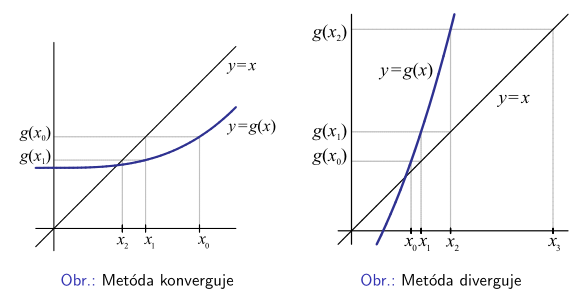 
$$\text{Zdroj: https://kam.uniza.sk/orsansky/pdf/5b_prednaska.pdf.}$$

Prirodzená a podstatná otázka znie, **za akých podmienok postupnosť $\left\{x_k\right\}_{k=0}^{\infty}$, vytvorená podľa vzťahu $(4)$, konverguje k pevnému bodu $z$ funkcie $g$ ?** 

Tieto prosté iterácie $(4)$ zrejme nebudú konvergovať vždy. Stačí napr. vziať $g(x)=x^2$, kedy pevné body sú dva, konkrétne $0$ a $1$. Ak zvolíme $x_0=2$, tak postupne dostávame $x_1=4$, $x_2=16$, $x_3=256\ldots$, keďže $x_{k+1}=x_k^2$, $k=0,1,2,\ldots$ 

Pre vyšetrovanie konvergencie postupných aproximácií je užitočná nasledujúca definícia. 

---

### <font color=red> Definícia 4 </font> 

Hovoríme, že funkcia **_$g$ spĺňa Lipschitzovu podmienku_** (je Lipschitzovsky spojitá) na množine $G$, ak existuje Lipschitzova konštanta $L\ge0$ taká, že pre každé $x,y\in G$ platí 

\begin{equation*} \label{ineq:LipschitzCondition} \tag{5} 
|g(x)-g(y)|\le L|x-y|. 
\end{equation*}

Ak funkcia $g$ spĺňa vzťah \eqref{ineq:LipschitzCondition} pre $0\le L < 1$, tak **_funkcia_** $g$ je **_kontraktívna_** (resp. kontrakcia). 

--- 

Pred dôkazom dôležitej matematickej vety, ktorá má čo dočinenia s konvergenciou metódy prostej iterácie, pripomenieme ešte jeden dôležitý pojem. 

---

### <font color=red> Definícia 5 </font> 

**_Postupnosť $\left\{x_k\right\}_{k=1}^{\infty}$_** sa nazýva **_Cauchyovska_**, ak pre ľubovoľné $\varepsilon>0$ existuje $N$ (závisiace od $\varepsilon$) také, že pre každé $k,l>N$ platí $|x_k-x_l|<\varepsilon$

--- 

---

#### Poznámka 6

* Dá sa dokázať, že **ak je postupnosť konvergentná, potom je Cauchyovská**. **Opačne to neplatí vždy** (závisí od matematickej  štruktúry resp. od priestoru, v ktorom pracujeme). 


* Pokiaľ uvažujeme číselné postupnosti **v reálnych alebo v komplexných číslach, je známe, že každá Cauchyovska postupnosť je konvergentná**. 


* Priestory, v ktorých Cauchyovske postupnosti konvergujú, sa nazývajú **_úplné priestory_**. 


* **Názorná vizualizácia typov spojitostí funkcie [tu](https://matematika.cuni.cz/dl/analyza/animace/k0021/spojitost/spojitost.html).**

--- 

--- 

### <font color=green> Veta 2 (O kontraktívnom zobrazení)  </font> 

Nech $g$ je kontraktívne zobrazenie (s Lipschitzovou konštantou $L$), ktoré zobrazuje množinu $G$ do samej seba (tzn. ak $x\in G$, tak $g(x)\in G$). Potom existuje jediné $z\in G$ také, že platí $z=g(z)$ a postupnosť určená vzťahom $(4)$ konverguje k prvku $z$ (pre ľubovoľné $x_0\in G$), pričom pre chybu aproximácie hodnoty $z$ potupnosťou $(4)$ platia nasledujúce vzťahy: 

\begin{equation*} \label{ineq:FixedPointIterErrEst1} \tag{6} 
|x_k-z|\le\dfrac{L^k}{1-L}|x_1-x_0|, \quad k=1,2,\ldots 
\end{equation*}

\begin{equation*} \label{ineq:FixedPointIterErrEst2} \tag{7} 
|x_k-z|\le\dfrac{L}{1-L}|x_k-x_{k-1}|, \quad k=1,2,\ldots 
\end{equation*}

---

---

#### Poznámka 7

Z dôkazu Vety 2 vyplýva (pozri napr. Ackleh, 2009), že $|x_k-z|=|g(x_{k-1})-g(z)|\le L|x_{k-1}-z|$. Táto nerovnosť indikuje, že **metóda prostej iterácie má v najhoršom prípade lineárny stupeň resp. rád konvergencie**. 

--- 

---

#### Poznámka 8

* Veta 2 sa zvykne formulovať i všeobecnejšie - pre metrické priestory, kde je známa ako *Banachova veta o pevnom bode*. 


* Treba poznamenať, že s aplikovaním Vety 2 sú spojené určité technické potiaže, ktoré teraz spomenieme a ďalej ukážeme, ako sa s nimi vysporiadať. 
 
 1. Môže byť náročné nájsť takú funkciu $g$, ktorá zobrazuje množinu $G$ na samú seba. 

 2. Nemusí byť jednoduché ukázať, že funkcia $g$ spĺňa Lipschitzovu podmienku na množine $G$. 

--- 

--- 

#### <font color=green> Tvrdenie 1 </font> 

Nech $g$ je spojite diferencovateľná funkcia, pre ktorej deriváciu platí $|g'(x)|<L$, $x\in G$. Potom $g$ spĺňa Lipschitzovu podmienku na množine $G$ a $L$ je príslušná Lipschitzova konštanta. 

--- 

--- 

#### <font color=blue> Príklad 5 </font> 

Vezmime $g(x)=-\dfrac{x^3}{6}+\dfrac{x^5}{120}$ a chceme nájsť Lipschitzovu konštantu $L$ na intervale $\langle -1/2, 1/2 \rangle$. 

Výpočet urobíme s využitím [intervalovej aritmetiky](https://sandbigbox.com/wiki/cs/Interval_arithmetic), pomocou ktorej efektívne vyčíslime $g'$ na intervale $\langle -1/2, 1/2 \rangle$. Keďže $g'(x)-=\dfrac{x^2}{2}+\dfrac{x^4}{24}$, tak máme 

$$g'\left(\langle-1/2,1/2\rangle\right)\in-\dfrac{1}{2}\langle-1/2,1/2\rangle^2+\dfrac{1}{24}\langle-1/2,1/2\rangle^4=-\dfrac{1}{2}\langle0,1/4\rangle+\dfrac{1}{24}\langle0,1/16\rangle=\langle-1/8,0\rangle+\langle0,1/384\rangle\subseteq\langle-0.125,0\rangle+\langle0,0.002605\rangle\subseteq\langle-0.125,0.00261\rangle.$$

Teda $|g'(x)|\le\underset{y\in\langle-0.125,0.00261\rangle}{\max}|y|=0.125$, čo znamená, že $g$ spĺňa Lipschitzovu podmienku s konštantou $L=0.125$.

---

Ďalej budeme predpokladať, že $G$ je [***uzavretá množina***](http://www.iam.fmph.uniba.sk/skripta/maiii/ii2.pdf) ([ekvivalentné definície](https://mathworld.wolfram.com/ClosedSet.html)), v našom prípade sa stačí obmedziť na uzavretý interval. Nepotrebujeme robiť úvahy príliš všeobecne. 

--- 

#### <font color=green> Tvrdenie 2 </font> 

Nech $g$ je spojite diferencovateľná funkcia, ktorej derivácia spĺňa podmienku $|g'(x)|\le L<1$ pre $x\in G$. Potom $g$ je kontraktívna funkcia na množine $G$. 

--- 

--- 

#### <font color=green> Tvrdenie 3 </font> 

Nech $\rho>0$ a $G=\langle c-\rho,c+\rho \rangle$. Ďalej nech $g$ je kontraktívna funkcia na množine $G$ s Lipschitzovou konštantou $L$, pričom $0\le L<1$ a zároveň nech platí $|g(c)-c|\le (1-L)\rho$. Potom $g$ zobrazuje $G$ na samú seba. 

--- 

--- 

#### <font color=green> Tvrdenie 4 </font> 

Nech $z$ je riešením rovnice $x=g(x)$. Ďalej predpokladajme, že $g'(x)$ je spojitá na (uzavretom) intervale obsahujúcom $z$ a platí $|g'(z)|<1$. Potom $g$ je kontrakcia na dostatočne malom intervale okolo $z$ a zároveň $g$ zobrazuje tento interval na samého seba. Preto, ak sa zvolí $x_0$ dostatočne blízko k $z$, tak $(4)$ bude konvergovať (k hodnote $z$). 

--- 

--- 

#### <font color=blue> Príklad 6 </font> 

Nech $g(x)=\dfrac{x}{2}+\dfrac{1}{x}$. Dokážte, že metóda prostej iterácie konverguje pre ľubovoľný štartovací bod $x_0$ z intervalu $\langle 1,2 \rangle$. 

<ins> Riešenie: </ins> 

K zdôvodneniu konvergencie využijeme Tvrdenie 2, Tvrdenie 3 a tiež Vetu 2. Zrejme $g'(x)=1/2-1/x^2$. Efektívne vyčíslime $g'$ na intervale $\langle 1,2 \rangle$ opäť pomocou intervalovej aritmetiky 

$$g'(\langle1,2\rangle)\in\dfrac{1}{2}-\dfrac{1}{\langle1,2\rangle^2}=\langle1/2,1/2\rangle-\dfrac{1}{\langle1,4\rangle}=\langle1/2,1/2\rangle-\langle1/4,1\rangle=\langle1/2,1/2\rangle+\langle-1,-1/4\rangle=\langle-1/2,1/4\rangle.$$

Tým pádom, keďže $g'(x)\in g'(\langle1,2\rangle)\in\langle-1/2,1/4\rangle$ pre každé $x\in\langle1,2\rangle$, tak zrejme $|g'(x)|\le\underset{x\in\langle-1/2,1/4\rangle}{\max}|x|=1/2$, pre každé $x\in \langle1,2\rangle$. Preto podľa Tvrdenia 2 je $g$ kontrakcia na intervale $\langle1,2\rangle$. Ďalej položme $\rho=1/2$, $c=3/2$, pričom platí $|g(3/2)-3/2|=1/12\le1/4$. Tým pádom podľa Tvrdenia 3 môžeme usúdiť, že $g$ zobrazuje interval $\langle1,2\rangle$ na interval $\langle1,2\rangle$. A Teda na základe Vety 2 dospejeme k záveru, že metóda prostej iterácie konverguje k pevnému bodu $z=g(z)$, pri ľubovoľnom štartovacom bode $x_0\in\langle1,2\rangle$.

In [1]:
from scipy import optimize

def g(x): 
    return x/2+1/x

print('startovaci bod z intervalu <1,2>')
r1 = optimize.fixed_point(g, 1, method='iteration') 
r2 = optimize.fixed_point(g, 1.2, method='iteration') 
r3 = optimize.fixed_point(g, 1.4, method='iteration') 
r4 = optimize.fixed_point(g, 1.5, method='iteration') 
r5 = optimize.fixed_point(g, 1.6, method='iteration')
r6 = optimize.fixed_point(g, 1.8, method='iteration') 
r7 = optimize.fixed_point(g, 2, method='iteration')
print(r1,r2,r3,r4,r5,r6,r7)
print('')
print('startovaci bod mimo intervalu <1,2>')
r8 = optimize.fixed_point(g, 0.5, method='iteration') 
r9 = optimize.fixed_point(g, 0.4, method='iteration')
print(r8,r9)

startovaci bod z intervalu <1,2>
1.414213562373095 1.414213562373095 1.414213562373095 1.414213562373095 1.414213562373095 1.414213562373095 1.414213562373095

startovaci bod mimo intervalu <1,2>
1.414213562373095 1.414213562373095


---

--- 

#### <font color=blue> Príklad 7 </font> 

Je dané $g(x)=4+\dfrac{1}{3}\sin(2x)$ a $x_{k+1}=4+\dfrac{1}{3}\sin(2x_k)$. Môžeme si všimnúť, že $|g'(x)|=\left|\dfrac{2}{3}\cos(2x)\right|\le\dfrac{2}{3}$ pre všetky $x\in\mathbb{R}$, a teda $g$ je kontrakcia na $\mathbb{R}$, preto môžeme vziať $G=\mathbb{R}$. Potom $g:\,G\to G$ je kontraktívna funkcia na množine $\mathbb{R}$. To znamená, že pre ľubovoľné $x_0\in\mathbb{R}$, postupnosť iterácií $x_{k+1}=g(x_k)$ bude konvergovať k pevnému bodu $z$ funkcie $g$, t. j. $g(z)=z$ resp. $4+\dfrac{1}{3}\sin(2z)=z$. Napr. pre $x_0=4$ dostaneme nasledujúce hodnoty: 

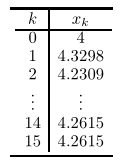 

---

<font color=orange> Zreprodukujte výpočet (resp. tabuľku) z Príkladu 7 v Python-e. </font> 

---

#### Poznámka 9

Predpokladajme, že funkcia $g$ spĺňa podmienky Vety 2 na množine $G=\langle a,b \rangle$. Taktiež predpokladajme, že $g(x)\le g(y)$ pre $a\le x \le y \le b$, teda $g$ je neklesajúca funkcia na intervale $\langle a,b \rangle$ (napr. $g$ je neklesajúca, ak $0\le g'(x) <1$ pre $x\in\langle a,b \rangle$). Položme $x_0=a$, tým pádom $x_1=g(x_0)\ge x_0$ (zrejme $x_1\ge a=x_0$ lebo $x_1\in\langle a,b \rangle$). Ďalej platí $x_2=g(x_1)\ge g(x_0)=x_1$, keďže $x_1\ge x_0$. Preto $a=x_0\le x_1 \le x_2 \le \ldots $ a monotónne $x_k\to z$ pre $k\to\infty$. Nasledujúci obrázok znázorňuje situáciu geometricky. Podobný výsledok platí aj pre funkciu $g$ nerastúcu  na intervale $\langle a,b \rangle$. 

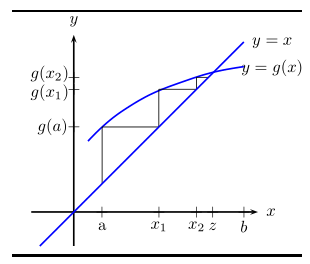 
$$\text{Zdroj: Ackleh (2009).}$$ 
 
--- 

--- 

### <font color=green> Veta 3  </font> 

Predpokladajme, že postupné iterácie $x_{k+1}=g(x_k)$ konvergujú k pevnému bodu $z$ funkcie $g$. Ďalej predpokladajme, že $p$ je prvé kladné celé číslo, pre ktoré platí $g^{(p)}(z)\neq0$, a keď $p=1$, tak $|g'(z)|<1$. Potom postupnosť $\{x_k\}$ vytvorená metódou prostej iterácie konverguje k bodu $z$, pričom konvergencia je rádu $p$ (predpokladá sa, že $g\in C^p(G)$, kde $G$ obsahuje $z$).  

---

---

#### Poznámka 10

* Vo všeobecnosti je pre metódu prostej iterácie $p=1$. To znamená, že v mnohých prípadoch táto iteračná metóda konverguje lineárne k hľadanému koreňu rovnice. 


* Rýchlosť konvergencie postupnosti $\{x_k\}$ postupných aproximácií k bodu $z$, kde $x_{k+1}=g(x_{k})$ a $z=g(z)$, závisí od správania sa funkcie $g$ v bode $z$. Dá sa dokázať, že ak $|g'(z)|>1$, tak pre $x_0\neq z$, postupnosť postupných aproximácií k bodu $z$ konvergovať nemôže. 
 
--- 

--- 

#### <font color=blue> Príklad 8 </font> 

Uvažujme $g(x)=\dfrac{x^2+6}{5}$ a $G=\langle1,2.3\rangle$. Všimnime si, že $g:\,G\to G$ a $|g'(x)|=\left|\dfrac{2x}{5}\right|<1$ pre $x\in G$. Podľa Vety 2 teda existuje jediný pevný bod $z\in G$ funkcie $g$. Je ľahko vidieť, že $z=2$. Naviac $g'(z)=\dfrac{4}{5}\neq0$, takže podľa Vety 3 je konvergencia k pevnému bodu lineárna. I nasledujúca tabuľka ilustruje, že konvergencia nie je príliš rýchla. 

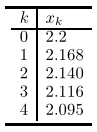 

---

--- 

#### <font color=blue> Príklad 9 </font> 

Vezmime $g(x)=\dfrac{x}{2}+\dfrac{2}{x}=\dfrac{x^2+4}{2x}$. Dá sa ukázať, že ak $0<x_0<2$, potom $x_1>2$ a tiež $x_k>x_{k+1}>2$ pre $x_k>2$. Teda postupnosť $\{x_k\}$ je klesajúca a zdola ohraničená hodnotou $2$, tým pádom je konvergentná. Čiže pre ľubovoľné $x_0\in(0,\infty)$, postupnosť $x_{k+1}=g(x_k)$ konverguje k $z=2$. 

Preskúmajme teraz rýchlosť konvergencie. Zrejme $g'(x)=\dfrac{1}{2}-\dfrac{2}{x^2}$, takže $g'(2)=0$. Ďalej $g''(x)=\dfrac{4}{x^3}$, a teda $g''(2)\neq0$. Podľa Vety 3 je konvergencia uvažovanej iteračnej metódy (resp. postupnosti) kvadratická a ilustruje to i nasledujúca tabuľka. 

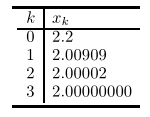

---

--- 

#### <font color=blue> Príklad 10 </font> 

Uvažujme $g(x)=\dfrac{3}{8}x^4-4$. Existuje jediný pevný bod tejto funkcie, konkrétne je to $z=2$. Keďže $g'(x)=\dfrac{3}{2}x^3$ a $g'(2)=12$, tak nemožno hovoriť o lineárnej konvergencii. V skutočnosti, postupné aproximácie konvergujú k pevnému bodu funkcie $g$ iba pre $x_0=2$. Totiž, ak $x_0>2$, potom $x_1>x_0>2$, $x_2>x_1>x_0>2$ atď. Podobne pre $x_0<2$ je možné overiť, že existuje $k$, kedy $x_k<0$ a následne $x_{k+1}>2$, čo je už rovnaká situácia ako bola predošlá (keď bolo $x_0>2$). Preto metóda postupných aproximácií diverguje, s výnimkou $x_0=2$. 

Prezentované úvahy ilustruje výpočet v Python-e uvedený nižšie. 

In [7]:
from scipy import optimize

def g(x): 
    return 3/8*x**4-4

r = optimize.fixed_point(g, 2, method='iteration') 
print(r)

2.0


In [5]:
r = optimize.fixed_point(g, 1, method='iteration') 
print(r)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


RuntimeError: Failed to converge after 500 iterations, value is inf

In [6]:
r = optimize.fixed_point(g, 2.5, method='iteration') 
print(r)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


RuntimeError: Failed to converge after 500 iterations, value is inf

--- 

--- 

#### <font color=blue> Príklad 11 </font> 

Uvažujme iteračnú schému $x_{k+1}=g(x_k)$, kde $g(x)=x-\dfrac{f(x)}{f'(x)}-\dfrac{f''(x)}{2f'(x)}\left[\dfrac{f(x)}{f'(x)}\right]$. 

Dá sa ľahko nahliadnuť, že ak $f(z)=0$, potom $g'(z)=g''(z)=0$ ale $g'''(z)\neq0$. Preto, ak metóda konverguje, tak ide o kubický stupeň (rád) konvergencie. 

---

--- 

#### <font color=blue> Príklad 12 </font> 

Metódou prostej iterácie nájdite na intervale $\langle -2,-1 \rangle$ koreň rovnice $e^x+x^2-3=0$ s presnosťou $0.01$. 

<ins> Riešenie: </ins>

Zadanú rovnicu upravíme na vhodný tvar 

\begin{align*} 
f(x) = e^x + x^2 - 3 & = 0 \\ 
x^2 & = 3 - e^x \\ 
x & = \pm\sqrt{3-e^x}. 
\end{align*}

Zrejme budeme hľadať pevný bod $z$ funkcie $g(x)=-\sqrt{3-e^x}$, nakoľko hľadáme záporný koreň rovnice $f(x)=0$ na intervale $\langle -2,-1 \rangle$.  

Overíme podmienku konvergencie iteračnej postupnosti $x_{k+1}=g(x_k)$. Zrejme $g'(x)=\dfrac{e^x}{2\sqrt{3-e^x}}$ Ďalej nájdeme maximum $|g'(x)|$ na intervale $\langle -2,-1 \rangle$. Na tomto intervale platí $g''(x)=\dfrac{e^x(6-e^x)}{4(3-e^x)^{3/2}}>0$, čiže $g'(x)$ je na $\langle -2,-1 \rangle$ rastúca a maximum má v bode $x=-1$, t. j. $g'(-1)=\dfrac{e^{-1}}{2\sqrt{3-e^{-1}}}\le0.12<1$.  

Ešte overíme, či funkcia $g$ zobrazuje interval $\langle -2,-1 \rangle$ do seba. Keďže je na tomto intervale funkcia $g$ monotónna, stačí overiť, či sa zobrazia krajné body intervalu $\langle -2,-1 \rangle$ do intervalu $\langle -2,-1 \rangle$: $g(-2)=-\sqrt{3-e^{-2}}\doteq-1.69\in\langle -2,-1 \rangle$ a podobne $g(-1)=-\sqrt{3-e^{-1}}\doteq-1.62\in\langle -2,-1 \rangle$. 

Keďže je konvergencia zaručená pre ľubovoľné $x_0\in\langle -2,-1 \rangle$, zvolíme napr. $x_0=-2$ a podľa iteračného vzťahu $x_{k+1}=-\sqrt{3-e^{x_k}}$ dostávame iteračnú postupnosť 

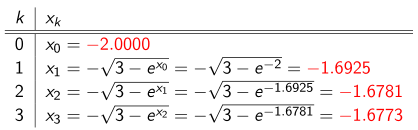 
$$\text{Zdroj: https://kam.uniza.sk/orsansky/pdf/5b_prednaska.pdf.}$$

Proces resp. výpočet je možné ukončiť, nakoľko platí $|x_3-x_2|=|-1.6773 + 1.6781|=0.0008 < 0.01=\varepsilon$, čím sa dosiahla požadovaná presnosť a približným riešením zadanej rovnice je $x_3=-1.6773$. 

---

--- 

#### <font color=blue> Príklad 13 </font> 

Nelineárna rovnica $f(x)=x^2-2x-3=0$ má korene $x^*_1=-1$ a $x^*_2=3$. Preskúmame konvergenciu ku koreňu $x^*_2=3$ pre niekoľko iteračných funkcií $g$. 

1. $g(x)=\dfrac{x^2-3}{2}$, $g'(x)=x$, $|g'(3)|=3$, pre $x_0\neq3$ konvergencia nenastane. 


2. $g(x)=\sqrt{2x+3}$, $g'(x)=\dfrac{1}{\sqrt{2x+3}}$, $|g'(3)|=1/3$, lineárna konvergencia nastane napr. pre ľubovoľné $x_0$ z intervalu $\langle 2,4 \rangle$, lebo vtedy $|g'(x)|\le1/\sqrt{7}$. 


3. $g(x)=2+\dfrac{3}{x}$, $g'(x)=-\dfrac{3}{x^2}$, $|g'(3)|=1/3$, lineárna konvergencia nastane napr. pre ľubovoľné $x_0$ z intervalu $\langle 2,4 \rangle$, lebo vtedy $|g'(x)|\le3/4$.


4. $g(x)=\dfrac{x^2+3}{2x-2}$, $g'(x)=-\dfrac{2(x^2-2x-3)}{(2x-2)^2}$, $g'(3)=0$, $g''(3)=1/2$, kvadratická konvergencia nastane napr. pre $x_0$ z intervalu $\langle 2.5,3.5 \rangle$, lebo vtedy $|g'(x)|\le0.39$. 

---

***
<a id=newton></a>
 # <font color=brown> Newtonova metóda (Newtonova-Raphsonova / dotyčnicová metóda)</font> 

Ako je to zvykom pri iteračných metódach, aj tu sa začína s počiatočnou aproximáciou $x_0$ a postupne sa aproximácia spresňuje generovaním postupnosti $x_1,x_2,\ldots$ spôsobom, ktorý teraz popíšeme. 

Predpokladajme, že máme aproximáciu $x_k$ hľadaného koreňa a máme určiť lepšiu aproximáciu $x_{k+1}$. Urobíme to tak, že bodom $[x_k,f(x_k)]$ vedieme dotyčnicu ku krivke $y=f(x)$ a priesečník dotyčnice s osou $x$ označíme ako $x_{k+1}$. Do rovnice dotyčnice 

$$y=f(x_k)+f'(x_k)(x-x_k)$$ 

dosadíme $y=0$, vypočítame $x$ a položíme $x_{k+1}=x$. Takto dostaneme **predpis** 

\begin{equation*} \label{eq:NewtonMethodStep} \tag{10} 
x_{k+1}=x_k-\dfrac{f(x_k)}{f'(x_k)}. 
\end{equation*} 

**Výpočet sa ukončí a $x_{k+1}$ sa považuje za dostatočne presnú aproximáciu koreňa, ak je splnená niektorá z nasledujúcich  (vopred zvolených) podmienok:**

\begin{equation*} \label{eq:NewtonMethodStopCrit} \tag{11} 
|x_{k+1}-x_k|\le\varepsilon, \quad\text{ alebo }\quad |x_{k+1}-x_k|\le\varepsilon|x_k| \quad\text{ alebo }\quad |f(x_{k+1})|\le\varepsilon,
\end{equation*} 

kde $\varepsilon$ je požadovaná (vopred zadaná) presnosť. Splnením vyšśie uvedených podmienok síce nie je zaručené, že $|x_{k+1}-x^*|\le\varepsilon$, no jedná sa o štandardné spôsoby ukončenia iterácií. Tieto tzv. **_kritéria zastavenia_** (ang. *stopping criteria*) sú vhodné aj pre ostatné metódy uvádzané v tejto téme.  

Niekoľko iterácií dotyčnicovej metódy ilustruje nasledujúci obrázok. Všimnite si postupné približovanie sa pomocou dotyčníc ku hľadanému koreňu.

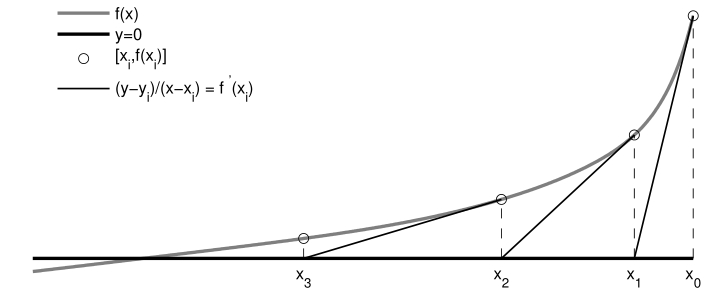 
$$\text{Zdroj: Čermák (2020).}$$ 


**Newtonova metóda** sa dá odvodiť aj inou úvahou - stačí vychádzať **z Taylorovho rozvoja funkcie** $f$ na okolí bodu $x_k$ ($x^*$ blízko $x_k$): 

$$0=f\left(x^*\right)=f(x_k)+f'(x_k)\left(x^*-x_k\right)+\dfrac{\left(x^*-x_k\right)^2}{2}f''(\xi_k),$$ 

kde $\xi_k$ leží medzi $x^*$ a $x_k$. Za predpokladu, že $\left(x^*-x_k\right)^2$ je dostatočne malé (zanedbateľné), dostávame vzťah 

$$x^*\approx x_k-\dfrac{f(x_k)}{f'(x_k)}.$$ 

Preto, ak položíme $x_{k+1}=x_k-\dfrac{f(x_k)}{f'(x_k)}$, tak očakávame, že $x_{k+1}$ bude bližšie ku $x^*$ ako bolo $x_k$. 

--- 

#### <font color=blue> Príklad 14 </font> 

Aplikujte dotyčnicovú metódu pre nájdenie koreňa rovnice $f(x)=0$, kde $f(x)=4\sin(x)-x^3-1$, pričom zvoľte počiatočnú aproximáciu $x_0=2$ a výpočet ukončite, keď nastane $|f(x_k)|<10^{-5}$.  

<ins> Riešenie: </ins> 

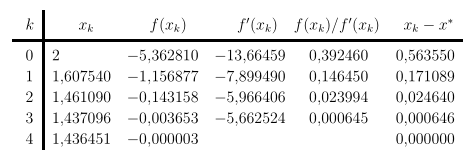 

Samozrejme, posledný stĺpec uvedenej tabuľky si vyžaduje znalosť presného riešenia zadanej rovnice. To je možné získať napr. tak, že zrealizujeme ešte jeden krok Newtonovej metódy. Dá sa totiž ukázať, že $x^*\doteq x_5=1.43645032$ má všetky cifry platné. Požadovaná presnosť bola dosiahnutá vo štvrtom kroku, kde $x_4\doteq1.43645$ má všetky cifry platné.  

In [82]:
from scipy import optimize 

f = lambda x: 4*np.sin(x) - x**3 - 1 

root1 = optimize.newton(f, 2, tol=10**(-5)) # nastavena tolerancia pre absolutnu chybu
print(root1) 

root2 = optimize.newton(f, 2) 
print(root2)

1.4364503291144364
1.4364503240398836


--- 

<font color=orange> Odkrokujte (v Python-e) výpočet z Príkladu 14. </font> 

## Konvergencia Newtonovej metódy 

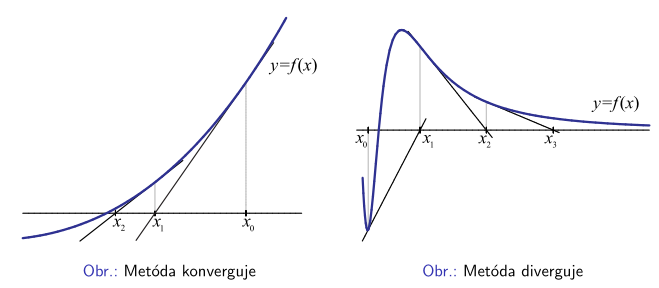 
$$\text{Zdroj: https://kam.uniza.sk/orsansky/pdf/5b_prednaska.pdf.}$$ 

Na ďalšom obrázku vľavo **Newtonova metóda diverguje**, na obrázku vpravo **osciluje**. 

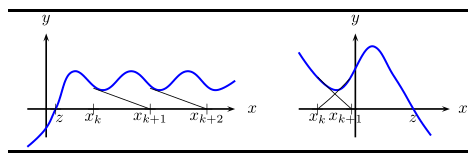 
$$\text{Zdroj: Ackleh (2009).}$$

Nech $e_k=x_k-x^*$ je chyba v $k$-tom kroku. Ukážeme, ako súvisí s chybou $e_{k+1}$  v nasledujúcom kroku. Z Taylorovho rozvoja $f\left(x^*\right)$ v okolí bodu $x_k$ dostaneme 

$$0=f\left(x^*\right)=f(x_k)+\left(x^*-x_k\right)f'(x_k)+\dfrac{1}{2}\left(x^*-x_k\right)^2f''(\xi),$$ 

kde $\xi$ je bod ležiaci medzi $x_k$ a $x^*$. Ak rovnicu vynásobime výrazom $\dfrac{1}{f'(x_k)}$, tak dostaneme 

$$-\dfrac{1}{2}\left(x^*-x_k\right)^2\dfrac{f''(\xi)}{f'(x_k)}=\dfrac{f(x_k)}{f'(x_k)}+\left(x^*-x_k\right)=x^*-\left[x_k-\dfrac{f(x_k)}{f'(x_k)}\right]=x^*-x_{k+1},$$ 

a teda máme 

\begin{equation*} \label{eq:NewtonMethodErr1} \tag{12} 
e_{k+1}=\dfrac{1}{2}\dfrac{f''(\xi)}{f'(x_k)}e^2_k,
\end{equation*} 

no a keď $x_k\to x^*$, potom 

$$\dfrac{e_{k+1}}{e_k^2}\to C,\quad \text{ kde } \quad C=\dfrac{1}{2}\dfrac{f''\left(x^*\right)}{f'\left(x^*\right)}.$$ 

Keďže chyba $e_{k+1}$ je úmerná druhej mocnine chyby $e_k$, hovoríme, že Newtonova metóda **_konverguje kvadraticky_** resp., že je **_druhého rádu_**. 

Už vieme, že **ak Newtonova metóda konverguje, tak rýchlosť konvergencie $x_k\to x^*$ je aspoň kvadratická** (pre niektoré funkcie môže byť i vyššia). Ostáva ešte zodpovedať otázku, **za akých podmienok je zaručené, že konvergencia vôbec nastane?** Objasníme aj túto záležitosť. 

Predpokladajme, že v nejakom okolí $I$ koreňa $x^*$ platí 

$$\dfrac{1}{2}\left|\dfrac{f''(y)}{f'(x)}\right|\le m, \quad \forall x,y\in I.$$ 

Ak $x_k\in I$, potom z $(12)$ plynie $|e_{k+1}|\le m|e_k|^2$ resp. $|me_{k+1}|\le|me_k|^2$. Opakovaním tejto úvahy dostaneme 

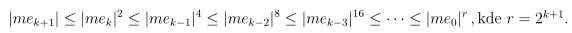 

Ak platí $|me_0|<1$, potom určite $e_{k+1}\to0$ a teda $x_{k+1}\to x^*$. Tým pádom sme ukázali, že **Newtonova metóda vždy konverguje za predpokladu, že počiatočnú aproximáciu zvolíme dostatočne blízko ku koreňu.** 

Dobrú počiatočnú aproximáciu $x_0$ je možné získať napr. metódou bisekcie. Vhodným spojením metódy bisekcie a Newtonovej metódy je možné zostrojiť tzv. *kombinovanú metódu*, ktorá vždy konverguje. V blízkosti koreňa sa pri tom uplatní iba Newtonova metóda, takže konvergencia je rýchla. 

Krátkym zamyslením spojeným s náčrtom je možné overiť, že Newtonova metóda konverguje, keď sú splnené tzv. **_Fourierove podmienky:_** 

a) $f\in C^2\langle a,b \rangle$ a súčasne $f(a)f(b)<0$;

b) $f'$, $f''$ nemenia na intervale $\langle a,b \rangle$ znamienko a $f'(x)\neq0$ pre každé $x\in\langle a,b \rangle$;

c) ako $x_0$ sa zvolí ten z bodov $a,b$, v ktorom platí $f(x_0)f''(x_0)>0$. 

V praxi však Fourierove podmienky nemusia byť vždy dobre uplatniteľné lebo pre "veľké" $b-a$ obvykle buď tieto podmienky nie sú splnené alebo je obtiažne ich platnosť overiť. 

<font color=purple> Extra: Overte, že splnenie Fourierovych podmienok zaručuje konvergenciu Newtonovej metódy. Za správne overenie je možné získať dva bonusové body. </font> 

---

#### Poznámka 11 

* Vhodnou úpravou rovnice $f(x)=0$ na tvar $g(x)=x$ môžeme dostať rôzne konkrétne iteračné metódy (ide o špeciálne prípady metódy prostej iterácie - viď Príklad 13). Napr. pre $g(x)=x-\dfrac{f(x)}{f'(x)}$ dostaneme Newtonovu metódu. 


* Rýchlosť konvergencie Newtonovej metódy je teda možné odvodiť z Vety 3. Ak uvážime $x_{k+1}=x_k-\dfrac{f(x_k)}{f'(x_k)}=g(x_k)$ a všimneme si, že $g(z)=z$, $g'(z)=0=1-\dfrac{f'(z)}{f'(z)}+\dfrac{f(z)f''(z)}{\left(f'(z)\right)^2}$ a zvyčajne $g''(z)\neq0$, tak kvadratická konvergencia plynie z Vety 3. 

---

***
<a id=secnice></a>
 # <font color=brown> Metóda sečníc </font> 

V každom kroku Newtonovej metódy je potrebné počítať hodnotu $f(x_k)$ a tiež deriváciu $f'(x_k)$. Pokiaľ nemáme k dispozícii vozrec pre výpočet derivácie alebo samotný výpočet je náročný (zdĺhavý), môžeme deriváciu aproximovať vzťahom 

$$f'(x_k)\approx\dfrac{f(x_k)-f(x_{k-1})}{x_k-x_{k-1}}.$$ 

Takto dostaneme **_metódu sečníc_**: najprv zadáme dve počiatočné aproximácie $x_0$, $x_1$ a následne počítame $x_2,x_3,\ldots$ podľa predpisu 

\begin{equation*} \label{eq:SecantMethodStep} \tag{13} 
x_{k+1}=x_k-\dfrac{x_k-x_{k-1}}{f(x_k)-f(x_{k-1})}f(x_k).
\end{equation*} 

Názov metódy vychádza z jej geometrickej interpretácie (viď obrázok nižšie): $x_{k+1}$ je $x$-ová súradnica priesečníka priamky prechádzajúcej bodmi $[x_{k-1},f(x_{k-1})]$, $[x_k,f(x_k)]$ s osou $x$: 

$$y=f(x_k)+\dfrac{f(x_k)-f(x_{k-1})}{x_k-x_{k-1}}(x-x_k)=0 \quad \Longrightarrow \quad x=x_{k+1}.$$ 

Keďže táto priamka pretína graf funkcie $f$, je to sečnica a odtiaľ je odvodený názov prezentovanej metódy. 

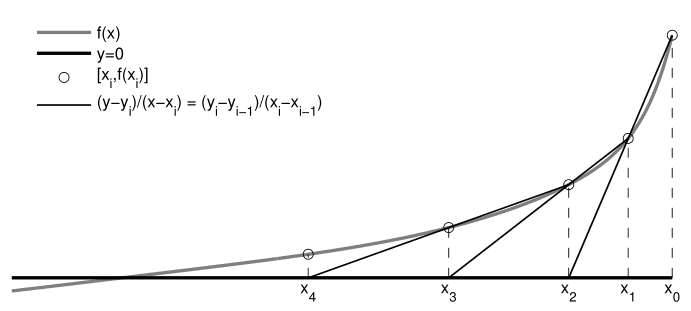
$$\text{Zdroj: Čermák (2020).}$$ 

Všimnite si, že v každom kroku sa vyčísľuje hodnota funkcie iba raz: vypočíta sa $f(x_k)$ a hodnota $f(x_{k-1})$ sa vezme z predošlého kroku. 

---

#### Poznámka 12 

* Dá sa odvodiť, že **rýchlosť konvergencie metódy sečníc je rádu $p=\dfrac{1+\sqrt{5}}{2}\approx1.618$**, teda o niečo nižší ako u dotyčnicovej metódy. Číslo $\dfrac{1+\sqrt{5}}{2}$ je tzv. [*zlatý rez*](https://www.quark.sk/zlaty-rez-je-len-jedno-konkretne-cislo/) (viac zaujímavostí napr. tu: [odkaz 1](https://www.math.sk/mpm/wp-content/uploads/2017/11/sipeky.pdf), [odkaz 2](https://digi-foto.sk/ako-fotografovat/kompozicia/zlaty-rez/)).

---

--- 

#### <font color=blue> Príklad 15 </font> 

Aplikujte metódu sečníc pre nájdenie koreňa rovnice $f(x)=0$, kde $f(x)=4\sin(x)-x^3-1$, pričom zvoľte počiatočné aproximácie $x_0=1$, $x_1=2$ a výpočet ukončite, keď nastane $|f(x_k)|<10^{-5}$.  

<ins> Riešenie: </ins> 

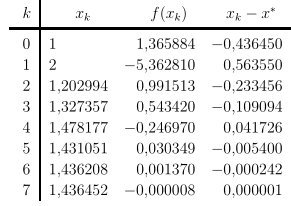 

Až do štvrtého kroku (výpočet $x_5$) je konvergencia pomerne pomalá. Rýchla konvergencia metódy sečníč sa začala prejavovať v posledných dvoch krokoch. 

In [6]:
from scipy import optimize 

f = lambda x: 4*np.sin(x) - x**3 - 1 

root1 = optimize.root_scalar(f, method='secant', xtol=10**(-5), x0=1, x1=2) # nastavena tolerancia pre absolutnu chybu
print(root1) 
print('===================================')
root2 = optimize.root_scalar(f, method='secant', rtol=10**(-5), x0=1, x1=2) # nastavena tolerancia pre relativnu chybu
print(root2) 
print('===================================')
root3 = optimize.root_scalar(f, method='secant',x0=1, x1=2) 
print(root3)

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 1.4364503236449233
      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 1.4364503236449233
      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 1.436450324039843


--- 

<font color=orange> Odkrokujte (v Python-e) výpočet z Príkladu 15. </font> 

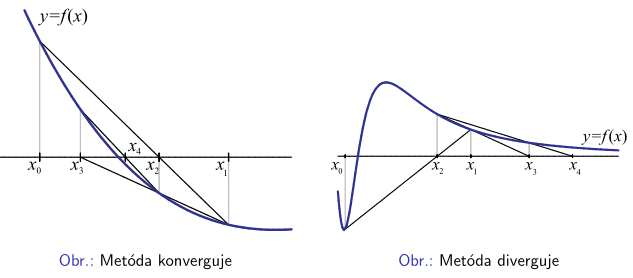 
$$\text{Zdroj: https://kam.uniza.sk/orsansky/pdf/5b_prednaska.pdf.}$$

---

#### Poznámka 13 

* **Metóda sečníc má zaručenú konvergenciu v prípade, že zvolené štartovacie hodnoty $x_0$, $x_1$ sú zvolené dostatočné blízko ku koreňu $x^*$.** To je možné zaistiť napr. metódou bisekcie. 


* Dá sa ukázať, že Fourierove podmienky uvedené v predchadzajúcej časti (o Newtonovej metóde) zaručujú konvergenciu aj pre metódu sečníc. 

---

***
<a id=regula_falsi></a>
 # <font color=brown> Metóda regula falsi (metóda tetív)</font> 

Ďalšia metóda, ktorá môže dobre poslúžiť na nájdenie rozumných počiatočných aproximácii (štartovacích hodnôt) pre inú metódu, je vlastne modifikáciou metódy sečníc a nazýva sa **_metóda tetív_** alebo tiež **_regula falsi_**. 

Počiatočné aproximácie $x_0$, $x_1$ sa volia tak, aby platilo $f(x_0)f(x_1)<0$. Nová aproximácia $x_{k+1}$ sa opäť získa ako priesečník sečnice s osou $x$. Tentokrát ale sečnica spája bod $[x_k,f(x_k)]$ s bodom $[x_l,f(x_l)]$, kde $l$ je najväčší index taký, pre ktorý platí $f(x_k)f(x_l)<0$. Výpočet sa teda realizuje podľa vzorca 

\begin{equation*} \label{eq:RegulaFalsiMethodStep} \tag{14} 
x_{k+1}=x_k-\dfrac{x_k-x_{l}}{f(x_k)-f(x_{l})}f(x_k), \quad k=1,2,\ldots.
\end{equation*}  

Pričom ale pre $k=1$ je $l=0$ a po vypočítaní $x_{k+1}$ sa určí index $l$ nasledovne: ak $f(x_{k+1})f(x_l)>0$, tak $l=k$, v opačnom prípade sa $l$ nemení. 

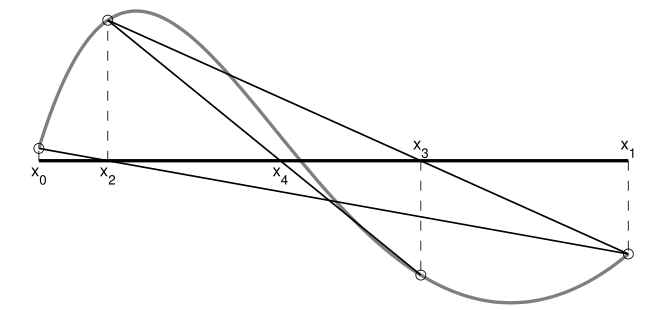 
$$\text{Zdroj: Čermák (2020).}$$ 

---

#### Poznámka 14 

**Výhodou metódy regula falsi je to, že podobne ako metóda bisekcie vždy konverguje**: Interval $I_k$ s koncovými bodmi $x_k$, $x_l$ obsahuje koreň. Na rozdiel od metódy bisekcie však dĺžka intervalu $I_k$ nekonverguje k nule! **Rýchlosť konvergencie metódy regula falsi je iba lineárna.** Preto sa väčšinou používa (podobne ako metóda bisekcie) pre získanie dobrých počiatočných aproximácií a následne sa prechádza na rýchlejšiu metódu.  

---

--- 

#### <font color=blue> Príklad 16 </font> 

Aplikujte metódu tetív pre nájdenie koreňa rovnice $f(x)=0$, kde $f(x)=4\sin(x)-x^3-1$, pričom zvoľte počiatočné aproximácie $x_0=1$, $x_1=2$.  

<ins> Riešenie: </ins> 

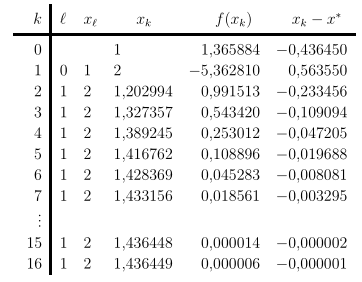 

Z tabuľky je vidieť, že začínajúc druhým krokom je $x_l=2$. Ďalej je zrejmé, že do štvrtého kroku je presnosť metódy regula falsi porovnateľná s presnosťou metódy sečníc (viď. Príklad 15). Potom je už ale badateľná lineárna konvergencia, pričom podmienka $|f(x_k)|<10^{-5}$ je splnená až pre $x_{16}$. Všimnite si, že dĺžka intervalu $I_k=(x_k,2)$, $k\ge2$ konverguje k číslu $2-x^*\doteq0.563550$. 

---

<font color=orange> Odkrokujte (v Python-e) výpočet z Príkladu 16 a znázornite graficky absolútnu chybu v závislosti od iterácie. </font> 

***
<a id=doplnujuce></a>
 # <font color=brown> Doplňujúce poznámky</font> 

## O násobných koreňoch

---

### <font color=red> Definícia 6 </font> 

Hovoríme, že koreň $x^*$ rovnice $f(x)=0$ má **_násobnosť $q$_**, ak funkcia $g(x)=\dfrac{f(x)}{\left(x-x^*\right)^q}$ je v bode $x^*$ definovaná a koreň v ňom už nemá, tzn. $0<\left|g(x^*)\right|<\infty$.  

--- 

---

#### Poznámka 15 

Ak má funkcia $f$ spojité derivácie až do rádu $q$ (vrátane) na okolí koreňa $x^*$ násobnosti $q$, potom platí $f^{(j)}\left(x^*\right)=0$, $j=0,1,\ldots,q-1$.   

---

Niektoré z doposiaľ uvedených metód je možné použiť aj na hľadanie násobných koreňov, konvergencia však býva pomalšia. Napr. Newtonova metóda v takom prípade konverguje iba lineárne s chybovou konštantou $C=\dfrac{q-1}{q}$, kde $q$ je násobnosť hľadaného koreňa. 

Keď očakávame, že rovnica $f(x)=0$ môže mať násobné korene, je vhodné využiť to, že rovnica $u(x)=\dfrac{f(x)}{f'(x)}=0$ má len jednoduché korene. Miesto rovnice $f(x)=0$ sa teda vyrieší rovnica $u(x)=0$. 

## O dosiahnuteľnej presnosti 

Nech $x_k$ je aproximácia jednoduchého koreňa $x^*$ rovnice $f(x)=0$. Pomocou vety o strednej hodnote dostaneme 

$$f(x_k)=f(x_k)-f\left(x^*\right)=f'(\xi)\left(x_k-x^*\right),$$

kde $\xi$ je nejaký bod ležiaci medzi $x_k$ a $x^*$. Predpokladajme, že pri výpočtoch pracujeme len s približnými hodnotami $\tilde{f}(x_k)=f(x_k)+\delta_k$, pričom $|\delta_k|<\delta$. Potom najlepší výsledok, ktorý je možné dosiahnúť je $\tilde{f}(x_k)=0$. V tom prípade je $|f(x_k)|\le\delta$, takže 

$$\left|x_k-x^*\right|=\dfrac{|f(x_k)|}{|f'(\xi)|}\le\dfrac{\delta}{|f'(\xi)|}\approx\dfrac{\delta}{\left|f'\left(x^*\right)\right|}=\varepsilon^*_x,$$ 

čo platí za predpokladu, že $f'$ sa v blízkosti koreňa príliš nemení. Vypočítať $x^*$ s menšou chybou než $\varepsilon^*_x$ teda nemožno. Preto sa $\varepsilon^*_x$ nazýva **_dosiahnuteľná presnosť koreňa_** $x^*$. 

Všimnite si nasledovnú vec: keď je veľkosť smernice $\left|f'\left(x^*\right)\right|$ v koreni $x^*$ malá, dosiahnuteľná presnosť $\varepsilon^*_x$ je veľká (pozri obrázok nižšie). V takom prípade je výpočet koreňa $x^*$ **zle podmienená úloha**: totiž malá zmena $f$ vyvolá veľkú zmenu $x^*$. 

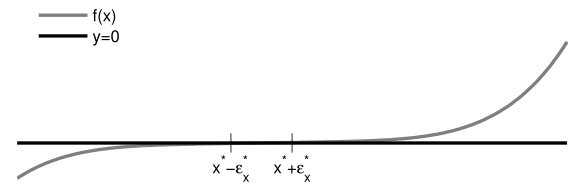 
$$\text{Zdroj: Čermák (2020).}$$ 

Podobná úvaha pre koreň násobnosti $q$ dáva dosiahnuteľnú presnosť $\varepsilon^*_x=\left(\dfrac{\delta\cdot q!}{f^{(q)}\left(x^*\right)}\right)^{1/q}$. Exponent $1/q$ je príčinou toho, že výpočet násobného koreňa je vo všeobecnosti zle podmienená úloha. Napr. pre $f(x)=x^q$ je $x^*=0$ koreň násobnosti $q$ a $\varepsilon^*_x=\delta^{1/q}$. Konkrétne pre $q=15$ a $\delta=10^{-15}$ dostaneme $\varepsilon^*_x=0.1$ !!

## O koreňoch polynómov

Polynóm $p_n(x)$ stupňa $n$ má vo všeobecnosti $n$ komplexných koreňov (Základná veta algebry). Pre výpočet jednoduchých reálnych koreňov rovnice $f(x)=0$, kde $f(x)=p_n(x)$, je možné aplikovať ľubovoľnú metódu prezentovanú v tomto učebnom texte. O tom, ako sa vysporiadať s prípadnými násobnými koreňmi pojednáva odstavec uvedený vyššie. Pre výpočet komplexných koreňov sa dá použiť napr. Newtonova metóda, pričom ako počiatočná aproximácia sa zvolí komplexné číslo. 

Pokiaľ nás zaujímajú všetky korene polynómu $p_n(x)$, tak po nájdení reálneho koreňa $x^*$, vydelíme polynóm $p_n(x)$ členom (resp. polynómom) $x-x^*$. Takto vznikne polynóm $p_{n-1}(x)=\dfrac{p_n(x)}{x-x^*}$ stupňa $n-1$ a ďalej hľadáme korene tohto nového polynómu nižšieho stupňa. Ak je $x^*$ komplexný koreň, tak potom je určite koreň aj komplexne združné číslo s ním, t. j. $\bar{x}^*$. V takom prípade sa vydelí polynóm $p_n(x)$ s reálnymi koeficientmi kvadratickým polynómom $\left(x-x^*\right)\left(x-\bar{x}^*\right)$, čím vznikne polynóm $p_{n-2}(x)$ stupňa $n-2$ s reálnymi koeficientmi a pokračuje sa hľadaním koreňov tohto polynómu. 

Pre výpočet polynómov sú samozrejme navrhnuté i špeciálne, efektívne metódy. 

<font color=purple> EXTRA: Vymyslite scenár, kedy aspoň jedna z iteračných metód na riešenie nelineárnej rovnice prezentovaných v učebnom texte zlyhá (tzn. nebude konvergovať). Výpočet ilustrujte v Pythone. Za korektný príklad je možné získať jeden bonusový bod. </font> 

---

#### Poznámka 16 

Metódu prostej iterácie ako aj Newtonovu metódu je možné rozšíriť na numerické riešenie sústav nelineárnych rovníc. Princíp pevného bodu je dôležitý napr. aj pri diferenciálnych rovniciach v matematickej analýze. 

---

---

<font color=purple> EXTRA: Naprogramujte (jednu) vybranú iteračnú metódu na riešenie nelineárnej rovnice tak, aby výsledkom bol interaktívny kód, kde bude možné nastaviť vstupné parametre, metódu odkrokovať a sledovať graficky, čo sa deje v jednotlivých iteráciách. V prípade korektného, okomentovaného kódu je možné získať 2 bonusové body. Za interaktívny kód pre každú ďalšiu metódu je možné získať po jednom bonusovom bode navyše. </font> 

***
<a id=zdroje></a>
 # <font color=brown> Použité zdroje</font> 

* Ackleh, A.S., Allen, E.J., Kearfott, R.B., & Seshaiyer, P. (2009). Classical and Modern Numerical Analysis: Theory, Methods and Practice. Chapman and Hall/CRC. 


* Burden, R. L., & Faires, J. D. (2011). Numerical analysis. Brooks/Cole, Cengage Learning. 


* Čermák, L. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Fajmon, B., Hlavičková, I., Novák, M., Vítovec, J. (2014). Numerická matematika a pravděpodobnost. Ústav matematiky FEKT VUT v Brně. 


* Gezerlis, A. (2020). Numerical methods in physics with Python. Cambridge University Press. 


* Gilli, M., Maringer, D., Schumann, E. (2019). Numerical Methods and Optimization in Finance. Elsevier/Academic Press. 


* Kiusalaas, J. (2013). Numerical Methods in Engineering with Python 3. Cambridge University Press, USA.


* Kincaid, D., & Cheney, E. W. (2002). Numerical analysis: Mathematics of scientific computing. Pacific Grove, CA: Brooks/Cole.


* Kiseľák, J. (2020). Základy numerických metód. ÚMV PF UPJŠ. 


* Kong, Q., Siauw, T., Bayen, A. (2020). [Python Programming and Numerical Methods: A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html). Academic Press. 


* Oršanský, P., Ftorek B. (2021). Štatistické a numerické metódy. EDIS - UNIZA.


* Růžičková, I. & Hlavička, R. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Sauer, T. (2011). Numerical Analysis. Addison-Wesley Publishing Company, USA. 


* Sullivan, E. (2020). Numerical Methods: An Inquiry-Based Approach With Python. Faculty Publications. 